## Financial Data Statistics

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/all_stocks_5yr.csv

--2020-07-09 19:13:53--  https://lazyprogrammer.me/course_files/all_stocks_5yr.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29580549 (28M) [text/csv]
Saving to: ‘all_stocks_5yr.csv’

all_stocks_5yr.csv  100%[===================>]  28.21M  13.0MB/s    in 2.2s    

2020-07-09 19:13:55 (13.0 MB/s) - ‘all_stocks_5yr.csv’ saved [29580549/29580549]



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('all_stocks_5yr.csv', parse_dates=True)

In [3]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


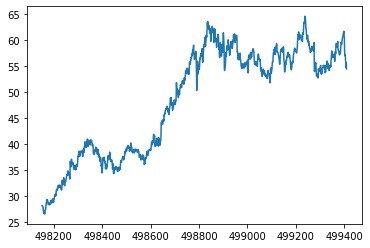

In [4]:
sbux['close'].plot();

In [5]:
sbux['prev_close'] = sbux['close'].shift(1)

In [6]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [7]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

In [8]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [9]:
sbux['return2'] = sbux['close'].pct_change(1)

In [10]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


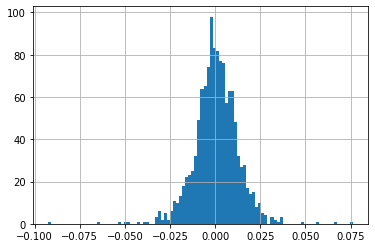

In [11]:
sbux['return'].hist(bins=100);

In [12]:
sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133879)

In [13]:
sbux['log_return'] = np.log(sbux['return'] + 1)

In [14]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


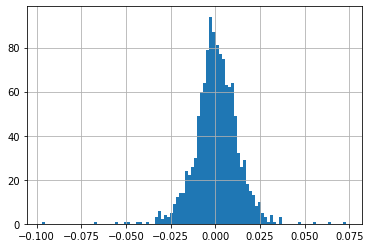

In [15]:
sbux['log_return'].hist(bins=100);

In [16]:
sbux['log_return'].mean(), sbux['log_return'].std()

(0.0005235902748108682, 0.012381234216101258)

## Normal Distribution

In [17]:
from scipy.stats import norm

### try simple return 

In [18]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [19]:
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

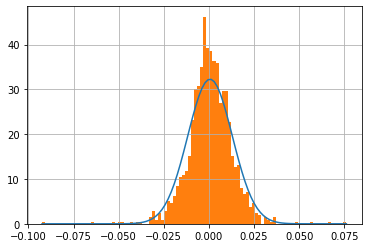

In [20]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True);

In [21]:
from scipy.stats import probplot

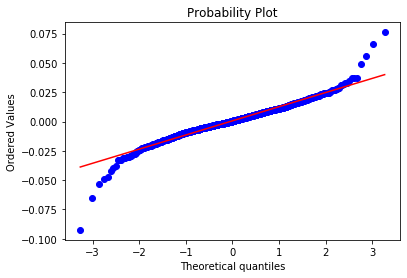

In [22]:
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt);

#### try statesmodel 

In [23]:
import statsmodels.api as sm

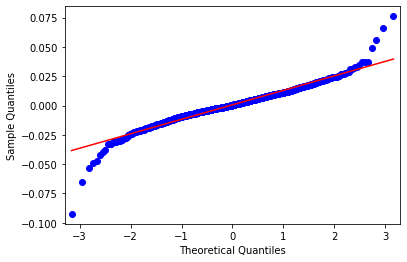

In [24]:
sm.qqplot(sbux['return'].dropna(), line='s');

### work with log return 

In [25]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [26]:
y_list = norm.pdf(x_list,
                  loc=sbux['log_return'].mean(),
                  scale=sbux['log_return'].std())

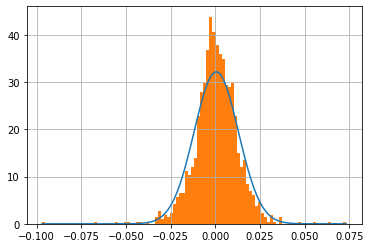

In [27]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);

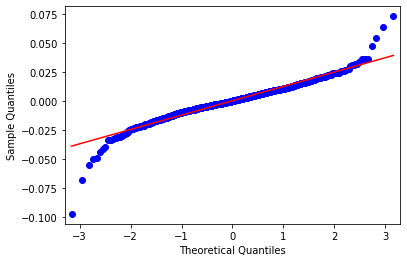

In [28]:
sm.qqplot(sbux['log_return'].dropna(), line='s');

## t-distribution

In [29]:
from scipy.stats import t # careful!

In [30]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [31]:
params = t.fit(sbux['return'].dropna())

In [32]:
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [33]:
df, loc, scale = params

### df: degree of freedom, loc: mean, scale: std 

In [34]:
y_list = t.pdf(x_list, df, loc, scale)

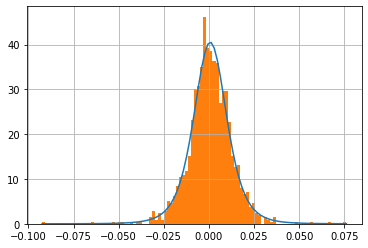

In [35]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True);

In [ ]:
sm.qqplot(sbux['return'].dropna(), dist=t, line='s');

TypeError: ignored

In [ ]:
probplot(sbux['return'].dropna(), dist='t', fit=True, plot=plt);

TypeError: ignored

### we need dof  (df) to run
* create our own class to provide df 
* not working for probplot.. since the dist is supported name, can not customized the function 

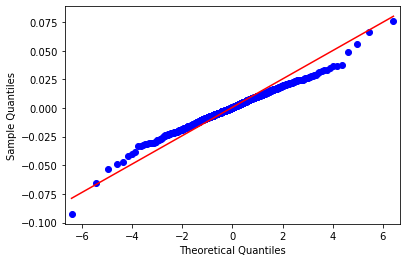

In [36]:
class myt:
  def __init__(self, df):
    self.df = df
  
  def fit(self, x):
    return t.fit(x)
  
  def ppf(self, x, loc=0, scale=1):
    return t.ppf(x, self.df, loc, scale)

sm.qqplot(sbux['return'].dropna(), dist=myt(df), line='s');

In [37]:
probplot(sbux['return'].dropna(), dist='myt(df)', fit=True, plot=plt);
## still not working ..

ValueError: myt(df) is not a valid distribution name

### try log return 

In [38]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [39]:
params = t.fit(sbux['log_return'].dropna())

In [40]:
df, loc, scale = params

In [41]:
y_list = t.pdf(x_list, df, loc, scale)

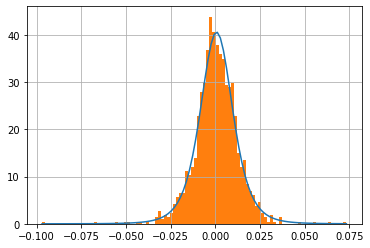

In [42]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);

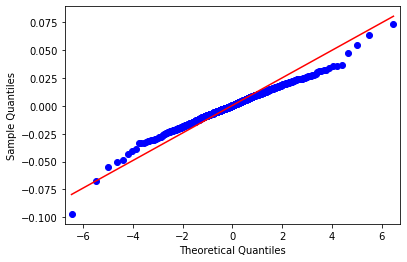

In [43]:
sm.qqplot(sbux['log_return'].dropna(), dist=myt(df), line='s');

## Skewness and Kurtosis

In [44]:
sbux['return'].skew()

-0.2680784195824153

In [45]:
sbux['return'].kurtosis()

5.593158903424731

In [46]:
sbux['log_return'].skew()

-0.41015501490182066

In [47]:
sbux['log_return'].kurtosis()

5.964502225799283

In [48]:
samp = pd.Series(np.random.randn(10000))
samp.skew(), samp.kurtosis()

(0.003038969962690345, 0.003932975820607254)

## Confidence Interval

In [49]:
values = sbux['return'].dropna().to_numpy()

In [50]:
m = values.mean()
s = values.std(ddof=1)

In [51]:
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

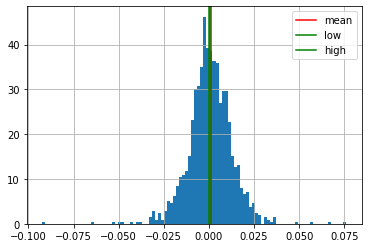

In [52]:
sbux['return'].hist(bins=100, density=True);
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend();

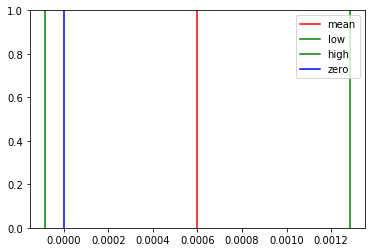

In [53]:
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.axvline(0, label='zero', color='blue');
plt.legend();

## Statistical Tests

In [54]:
from scipy.stats import jarque_bera, normaltest

### normaltest and jarque_bera test, test if given data is normal dist or not
* null hypothesis : the data is normal distribution
* if p value < 0.05, reject the hypothesis, the input data is NOT normal distribtion 

In [65]:
xxx = np.random.random(10000)
print('xxx: is uniform distribution', jarque_bera(xxx))
xxx2 = np.random.randn(10000)
print('xxx2 is normal:', jarque_bera(xxx2))
print('normal test on xxx:', normaltest(xxx))
print('normal test on xxx2:', normaltest(xxx2))
      

xxx: is uniform distribution (591.1845350068317, 0.0)
xxx2 is normal: (0.06644589608216034, 0.9673228728068684)
normal test on xxx: NormaltestResult(statistic=8030.096310259718, pvalue=0.0)
normal test on xxx2: NormaltestResult(statistic=0.06994850686179761, pvalue=0.9656302776041865)


In [ ]:
jarque_bera(values)

(1639.0284386552219, 0.0)

In [ ]:
normaltest(values)

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [66]:
jarque_bera(sbux['log_return'].dropna())

(1882.1814629047672, 0.0)

In [67]:
normaltest(sbux['log_return'].dropna())

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

In [68]:
from scipy.stats import kstest

### we need cdf function for kstest
* ks test is Kolmogrov-Smirnov test 

In [70]:
df, loc, scale = t.fit(values)
print('dof :', df)
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(values, cdf)

dof : 4.78753221828017


KstestResult(statistic=0.01887566203844726, pvalue=0.7612414101887692)

In [71]:
df, loc, scale = t.fit(sbux['log_return'].dropna())
print ('dof:', df)
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(sbux['log_return'].dropna(), cdf)

dof: 4.75336721921499


KstestResult(statistic=0.01837990941957013, pvalue=0.7890580916019734)

### 1 sample t-test 

In [72]:
from scipy.stats import ttest_1samp

In [73]:
ttest_1samp(values, 0)

Ttest_1sampResult(statistic=1.7223010261810556, pvalue=0.08526098717694539)

In [74]:
ttest_1samp(sbux['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=1.4999195047533647, pvalue=0.13388636615667793)

### the p-value > 0.05, fail to reject H0, (H0 hypothsize that input data mean = 0)
* need to figure out what is ttest_1samp

### try other stock 'MMM '

In [75]:
mmm = data[data['Name'] == 'MMM'].copy()

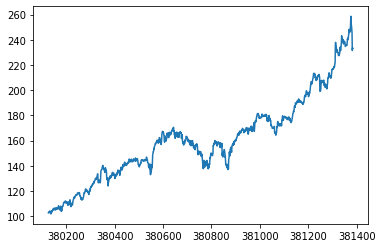

In [76]:
mmm['close'].plot();

In [77]:
mmm['prev_close'] = mmm['close'].shift(1)
mmm['return'] = mmm['close'] / mmm['prev_close'] - 1
mmm['log_return'] = np.log(mmm['return'] + 1)

In [78]:
mmm['return'].mean(), mmm['return'].std()

(0.0007001182500580143, 0.009768718404053094)

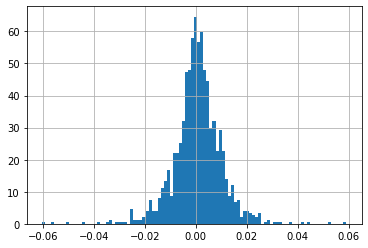

In [79]:
mmm['return'].hist(bins=100, density=True);

In [80]:
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)
low = m - 1.96 * s / np.sqrt(len(mmm['return']))
high = m + 1.96 * s / np.sqrt(len(mmm['return']))
print(low, high, m, s)

0.0001605072466054154 0.0012397292535106133 0.0007001182500580143 0.009768718404053094


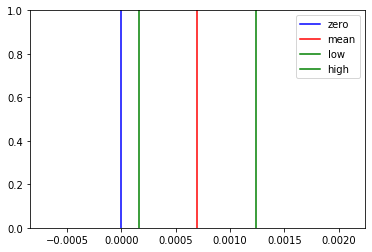

In [81]:
plt.xlim((low - 0.001, high + 0.001))
plt.axvline(0, label='zero', color='blue');
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend()

In [82]:
ttest_1samp(mmm['return'].dropna(), 0)

Ttest_1sampResult(statistic=2.541991701703365, pvalue=0.011141496531324404)

In [83]:
ttest_1samp(mmm['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=2.365963115873947, pvalue=0.018134246809755054)

### MMM the return mean is not zero 

## Covariance and Correlation

In [84]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

File 'sp500_close.csv' already there; not retrieving.



In [85]:
close = pd.read_csv('sp500_close.csv')

975

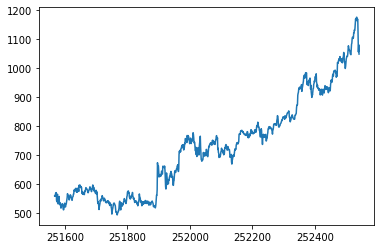

In [86]:
goog = data[data['Name'] == 'GOOG']
goog['close'].plot();
len(goog)

In [87]:
symbols = ['AAPL', 'GOOG', 'IBM', 'NFLX', 'SBUX']
sub = close[symbols].copy()

In [88]:
sub.dropna(axis=0, how='all', inplace=True)

In [89]:
sub.head()

,AAPL,GOOG,IBM,NFLX,SBUX
0,67.8542,NaN,201.68,25.8528,28.185
3,68.5614,NaN,200.16,25.4128,28.070
4,66.8428,NaN,200.04,25.4214,28.130
5,66.7156,NaN,200.09,26.6098,27.915
6,66.6556,NaN,199.65,26.7714,27.775


In [90]:
for symbol in symbols:
  sub[symbol + '_prev'] = sub[symbol].shift(1)
  sub[symbol + '_ret'] = sub[symbol] / sub[symbol + '_prev'] - 1

In [91]:
sub.head()

,AAPL,GOOG,IBM,NFLX,SBUX,AAPL_prev,AAPL_ret,GOOG_prev,GOOG_ret,IBM_prev,IBM_ret,NFLX_prev,NFLX_ret,SBUX_prev,SBUX_ret
0,67.8542,NaN,201.68,25.8528,28.185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68.5614,NaN,200.16,25.4128,28.070,67.8542,0.010422,NaN,NaN,201.68,-0.007537,25.8528,-0.017019,28.185,-0.004080
4,66.8428,NaN,200.04,25.4214,28.130,68.5614,-0.025067,NaN,NaN,200.16,-0.000600,25.4128,0.000338,28.070,0.002138
5,66.7156,NaN,200.09,26.6098,27.915,66.8428,-0.001903,NaN,NaN,200.04,0.000250,25.4214,0.046748,28.130,-0.007643
6,66.6556,NaN,199.65,26.7714,27.775,66.7156,-0.000899,NaN,NaN,200.09,-0.002199,26.6098,0.006073,27.915,-0.005015


In [92]:
rets = sub[[symbol + '_ret' for symbol in symbols]].copy()

In [93]:
rets.head()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015


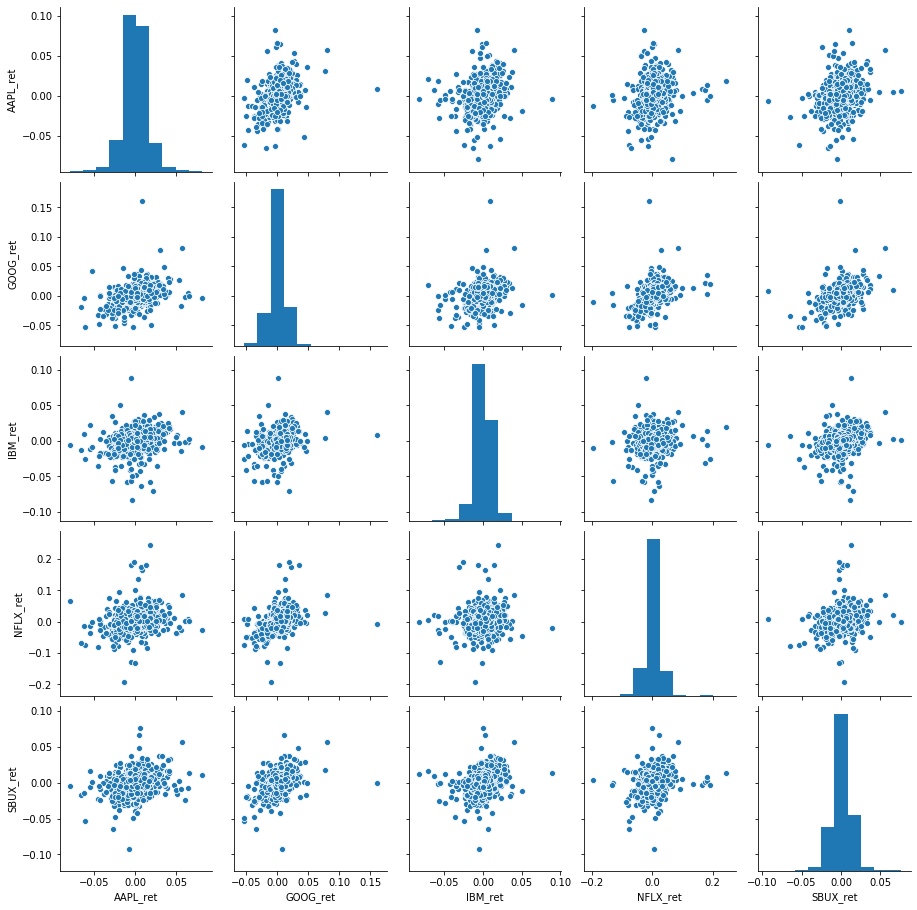

In [94]:
import seaborn as sns
sns.pairplot(rets);

In [ ]:
rets.mean()

AAPL_ret    0.000786
GOOG_ret    0.000745
IBM_ret    -0.000144
NFLX_ret    0.002217
SBUX_ret    0.000600
dtype: float64

In [ ]:
rets.std()

AAPL_ret    0.014593
GOOG_ret    0.014069
IBM_ret     0.011876
NFLX_ret    0.027353
SBUX_ret    0.012361
dtype: float64

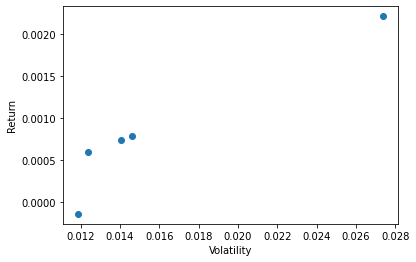

In [ ]:
plt.scatter(rets.std(), rets.mean())
plt.xlabel('Volatility')
plt.ylabel('Return');

In [ ]:
rets.corr()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,1.000000,0.415487,0.263927,0.227387,0.307716
GOOG_ret,0.415487,1.000000,0.345643,0.404768,0.455936
IBM_ret,0.263927,0.345643,1.000000,0.163267,0.315263
NFLX_ret,0.227387,0.404768,0.163267,1.000000,0.266012
SBUX_ret,0.307716,0.455936,0.315263,0.266012,1.000000


In [ ]:
rets.cov()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,0.000213,0.000084,0.000046,0.000091,0.000056
GOOG_ret,0.000084,0.000198,0.000058,0.000151,0.000079
IBM_ret,0.000046,0.000058,0.000141,0.000053,0.000046
NFLX_ret,0.000091,0.000151,0.000053,0.000748,0.000090
SBUX_ret,0.000056,0.000079,0.000046,0.000090,0.000153


## Mixture of Gaussians

In [95]:
x_list = np.linspace(-0.1, 0.1, 500)

In [96]:
p = 0.5
fx = p * norm.pdf(x_list, loc=0, scale=0.01) + \
     (1 - p) * norm.pdf(x_list, loc=0, scale=0.002)

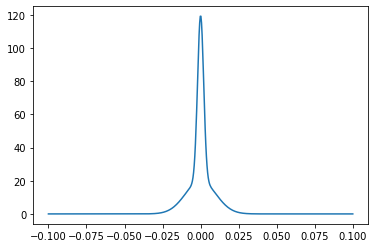

In [97]:
plt.plot(x_list, fx);

In [98]:
# generate samples from our model
samples = []
m0, s0 = 0, 0.01
m1, s1 = 0, 0.002
for _ in range(5000):
  if np.random.random() < p:
    # choose Gaussian 0
    x = norm.rvs(m0, s0)
  else:
    # choose Gaussian 1
    x = norm.rvs(m1, s1)
  samples.append(x)

series = pd.Series(samples)
series.kurtosis()

2.2162197241725288

### Kurtosis > 0.. heavy tail than normal distribution 

In [99]:
from sklearn.mixture import GaussianMixture

data = sbux['log_return'].dropna().to_numpy().reshape(-1, 1)
model = GaussianMixture(n_components=2)
model.fit(data)

weights = model.weights_
means = model.means_
cov = model.covariances_
print("weights:", weights)
print("means:", means)
print("variances:", cov)

weights: [0.60885487 0.39114513]
means: [[ 0.00116085]
 [-0.00046837]]
variances: [[[6.43749913e-05]]

 [[2.92336361e-04]]]


In [100]:
means = means.flatten()
var = cov.flatten()
print(means, var)

[ 0.00116085 -0.00046837] [6.43749913e-05 2.92336361e-04]


In [101]:
x_list = np.linspace(data.min(), data.max(), 100)
fx0 = norm.pdf(x_list, means[0], np.sqrt(var[0]))
fx1 = norm.pdf(x_list, means[1], np.sqrt(var[1]))
fx = weights[0] * fx0 + weights[1] * fx1

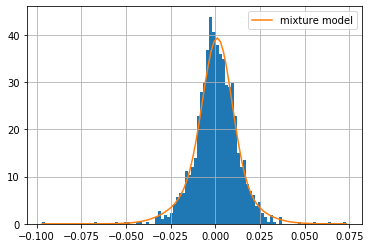

In [102]:
sbux['log_return'].hist(bins=100, density=True)
plt.plot(x_list, fx, label='mixture model')
plt.legend();

## Volatility Clustering

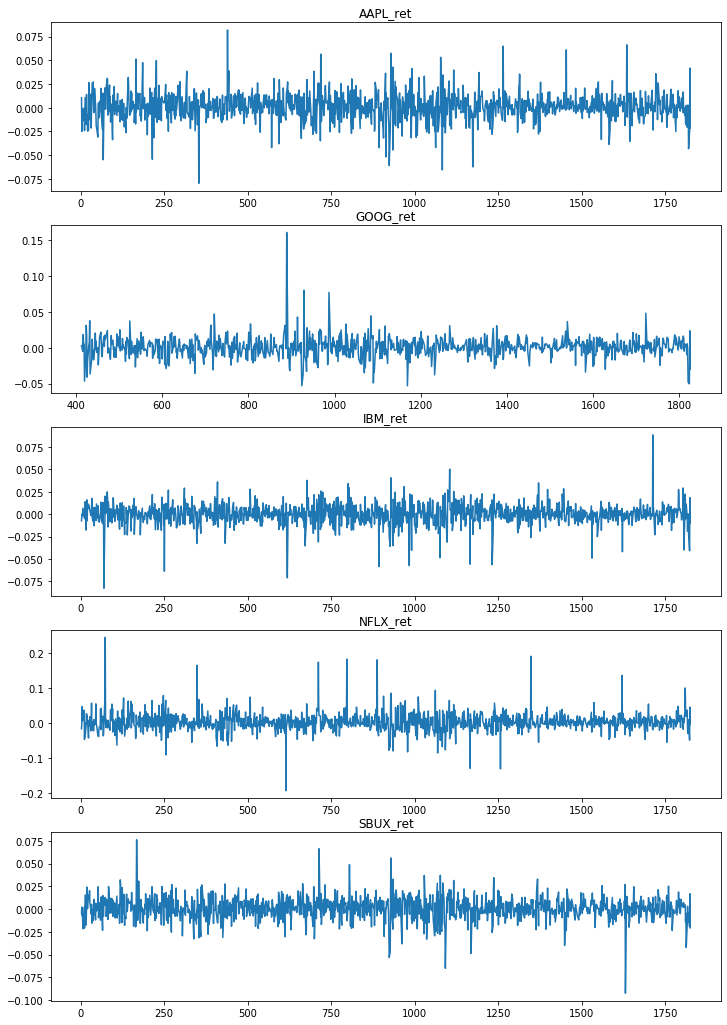

In [103]:
for i, symbol in enumerate(rets.columns):
  plt.subplot(len(rets.columns), 1, i + 1)
  plt.title(symbol)
  rets[symbol].plot(figsize=(12,18));

## Price Simulation

In [104]:
p0 = sbux.iloc[-1]['close']
prices = [p0]
returns = sbux['return'].dropna()
for _ in range(100):
  r = np.random.choice(returns)
  p = prices[-1] * (1 + r)
  prices.append(p)

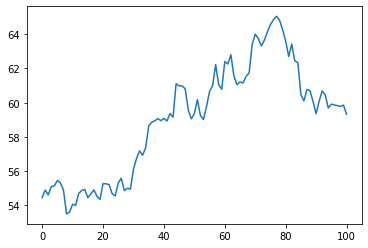

In [105]:
plt.plot(prices);

In [106]:
df, loc, scale = t.fit(sbux['return'].dropna())
p0 = sbux.iloc[-1]['close']
prices = [p0]
for _ in range(100):
  r = t.rvs(df, loc, scale)
  p = prices[-1] * (1 + r)
  prices.append(p)

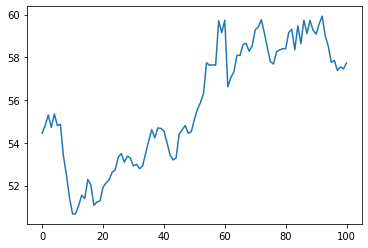

In [107]:
plt.plot(prices);